<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer: This is the data collected for each of the independent variables (x1, x2, x...)
### Hidden Layer: These are layers containing different itterations of an activation function; inputs are fed to this layer and assigned different weights accross a span of nodes/neurons/activation functions to determine the makeup of the output layer. 
### Output Layer: This is where the layer that transmits information from the neural network to the user 
### Neuron: the units in a neural network that recieve inputs from other nodes or an external source to compute an output
### Weight: This is the importance assigned a variable relative to a full list of variables under consideration, which have a place in the activation function
### Activation Function: This is the source of non-linearity in the outputs of a neuron/node and determines what gets passed to latter layers of a neural-network
### Node Map: These are handy visualizations used to better understand different types of neural networks. 
### Perceptron: See neuron; strictly for use in reference to artificial neural networks


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [94]:
pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=c8d00df0241a22181d72806f8a99be101428ae28229368908c6f7fccb756b8e5
  Stored in directory: /Users/Person/Library/Caches/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x): # used to update weights of sigmoid function
    sx = sigmoid(x)
    return sx * (1-sx)

def NAND(x1, x2):
    x = np.array([1, x1, x2])
    w = np.array([1.5, -1, -1])
    y = np.sum(w*x)
    if y <= 0:
        return 0
    else:
        return 1
    

In [3]:
correct_outputs = [[1], [1], [1], [0]]
inputs = np.array(df.drop(columns = 'y'))
inputs

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

In [6]:
weights = 2 * np.random.random((2,1)) - 1
weights

array([[-0.91485168],
       [ 0.64453539]])

In [7]:
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[ 0.        ],
       [-0.91485168],
       [ 0.64453539],
       [-0.2703163 ]])

In [8]:
activated_output = sigmoid(weighted_sum)
activated_output # True values are (1,1,1,0)

array([[0.5       ],
       [0.28600806],
       [0.65577797],
       [0.43282945]])

In [9]:
error = correct_outputs - activated_output
error

array([[ 0.5       ],
       [ 0.71399194],
       [ 0.34422203],
       [-0.43282945]])

In [10]:
adjusted = error = sigmoid_derivative(activated_output)
adjusted

array([[0.23500371],
       [0.24495636],
       [0.22493752],
       [0.23864729]])

In [11]:
weights += np.dot(inputs.T, adjusted)
weights

array([[-0.43124803],
       [ 1.1081202 ]])

In [12]:
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[ 0.        ],
       [-0.43124803],
       [ 1.1081202 ],
       [ 0.67687216]])

In [13]:
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.5       ],
       [0.39382835],
       [0.75177849],
       [0.66304024]])

In [14]:
inputs
weights

array([[-0.43124803],
       [ 1.1081202 ]])

In [15]:
for iteration in range(100):

    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Calc error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-0.00087935]
 [ 0.00087943]]
Output after training
[[0.5       ]
 [0.49976464]
 [0.50023538]
 [0.50000002]]


In [16]:
# Make an NAND perceptron 
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

dataset = np.array(df)

# Refer to domain experts for NAND weights
weights = 1.5, -1, -1 

for row in dataset:
    prediction = predict(row, weights)
    print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=0, Predicted=0


In [17]:
# Training network weights, no need to 
#  refer to domain experts to derive the 
#  appropriate weight values - see results below

# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights

l_rate = 0.1
n_epoch = 10
weight = train_weights(dataset, l_rate, n_epoch)
print(weights)

>epoch=0, lrate=0.100, error=1.000
>epoch=1, lrate=0.100, error=3.000
>epoch=2, lrate=0.100, error=3.000
>epoch=3, lrate=0.100, error=2.000
>epoch=4, lrate=0.100, error=1.000
>epoch=5, lrate=0.100, error=0.000
>epoch=6, lrate=0.100, error=0.000
>epoch=7, lrate=0.100, error=0.000
>epoch=8, lrate=0.100, error=0.000
>epoch=9, lrate=0.100, error=0.000
(1.5, -1, -1)


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [227]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()
diabetes.shape

(768, 9)

Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [236]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, Normalizer
import matplotlib.pyplot as plt

y = diabetes.iloc[0:100, 8].values
X = diabetes.iloc[0:100, 0:7].values

In [237]:
# Scale the dataset
# Get column names first
names = diabetes.columns# Create the Scaler object
scaler = preprocessing.MinMaxScaler()# Fit your data on the scaler object
scaled_df = scaler.fit_transform(diabetes)
scaled_df = pd.DataFrame(scaled_df, columns=names)

/Users/Person/anaconda3/envs/NLP/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [238]:
y = scaled_df.iloc[0:100, 8].values
X = scaled_df.iloc[0:100, 0:7].values

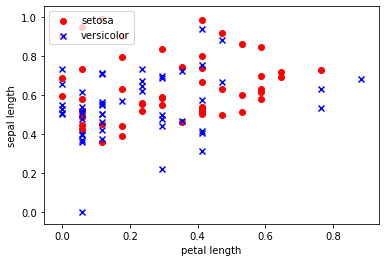

In [239]:
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

In [240]:
class Perceptron(object):
  def __init__(self, rate = 0.01, niter = 10):
    self.rate = rate
    self.niter = niter

  def fit(self, X, y):
    """Fit training data
    X : Training vectors, X.shape : [#samples, #features]
    y : Target values, y.shape : [#samples]
    """

    # weights
    self.weight = np.zeros(1 + X.shape[1])

    # Number of misclassifications
    self.errors = []  # Number of misclassifications

    for i in range(self.niter):
      err = 0
      for xi, target in zip(X, y):
        delta_w = self.rate * (target - self.predict(xi))
        self.weight[1:] += delta_w * xi
        self.weight[0] += delta_w
        err += int(delta_w != 0.0)
      self.errors.append(err)
    return self

  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.weight[1:]) + self.weight[0]

  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)

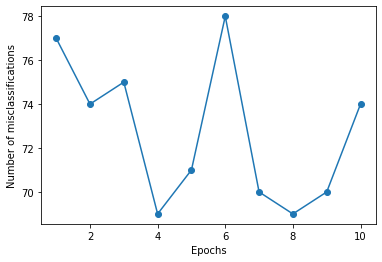

In [241]:
pn = Perceptron(0.1, 10)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()
# looks like 4 epochs should do the trick

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?